In [1]:
import pypint
import biolqm
import ginsim
import matplotlib.pyplot as plt
import pandas as pd # For visalizing the dataframe
import seaborn as sb # For generating the heatmap

This notebook has been executed using the docker image `colomoto/colomoto-docker:2021-01-01`

# From COVID-19 Disease Map to a Macrophage Executable Logical Model

## 1. Generation of  macrophage-specific modules
To make the Macrophage polarization model COVID19-specific the information from the <a href="https://covid.pages.uni.lu/minerva-guide/"> COVID-19 Disease Map project </a> was used. Curated signaling pathway mechanisms are represented as molecular interaction diagrams in the MINERVA platform. Three of these diagrams were chosen by their relevance in macrophages (part of or affecting the macrophage signaling cascades) to be integrated into the Macrophage polarization model developed at NTNU. The next subsections describe the steps taken to process the diagrams and make them macrophage-specific before the integration.

### 1.1. Molecular interaction diagrams
The chosen diagrams include the <a href="https://fairdomhub.org/models/713">Type 1 interferon response </a> (Anna Niarakis, Vidisha Singh, Sara Aghamiri) (Figure 1.1.1), <a href="https://fairdomhub.org/models/709 ">the ACE/ACE2 axes</a> (Enrico Glaab, Andreas Ruepp, Corinna Montrone, Gisela Fobo) (Figure 1.1.2), and <a href="https://git-r3lab.uni.lu/covid/models/-/tree/master/Curation/Inflammasomes">the NLRP3 inflammasome signaling </a> (Julia Somers, Ebru Kocakaya, Emek Demir) (Figure 1.1.3), being all of them available at the public <a
href="https://git-r3lab.uni.lu/covid/models">Gitlab repository</a>. In addition to the type 1 interferon response, the first model includes the cellular signaling triggered by RIG-1 (cytosolic PRR) and TLR7 (transmembrane PRR).

<br>
<center><img src="https://fairdomhub.org/models/718/model_images/136"> <br>
Figure 1.1.1 Type 1 IFN process diagram. </center>

<br>
<center><img src="https://fairdomhub.org/models/709/model_images/129"> <br>
Figure 1.1.2. ACE/ACE2 axes (renin-angiotensin system) process diagram. </center>

<br>
<center><img src="https://i.ibb.co/C6kSh13/NLRP3-MO-Viviam-Marco.png"> <br>
Figure 1.1.3. NLRP3 inflammasome pathway process diagram. </center>

### 1.2. Generation of CasQ files

The process diagrams in MINERVA were downloaded in SBML format. Then, executable logical modules of these diagrams were automatically obtained as SBML-qual files using the <a href="https://lifeware.inria.fr/~soliman/post/casq/">CasQ tool</a>. SSince our research group mainly works with .zginml files when building logical models, these archives were imported and organized in <a href="">GINsim</a> (Figures 1.2.1 - 1.2.3).

##### 1.2.1. Type 1 interferon response
Links:
- <a href="link_required">CasQ file</a>
- <a href="link_required">GINsim file</a> (Figure 1.2.1)

In [109]:
# Loading the GINsim file 

T1IFN_casq = ginsim.load("/tmp/colomotoh9z0y90q_interferon.zginml")
ginsim.show(T1IFN_casq)

<center>Figure 1.2.1. Type 1 interferon response model (GINsim file).</center>

In [11]:
# Loading the GINsim file in Pint to perform a model summary analysis

T1IFN_casq_pint = pypint.load("/tmp/colomoto_qzdbj1p_interferon.zginml")
T1IFN_casq_pint.summary()

{'nb_automata': 102,
 'nb_local_states': 204,
 'max_local_states': 2,
 'nb_transitions': 233,
 'nb_states': 5070602400912917605986812821504}

##### 1.2.2. ACE/ACE2 axes
Links:
- <a href="link_required">CasQ file</a>
- <a href="link_required">GINsim file</a> (Figure 1.2.2)

In [111]:
# Loading the GINsim file 

ACE_ACE2_casq = ginsim.load("/tmp/colomotosbrvv7s1_ACE_ACE2.zginml")
ginsim.show(ACE_ACE2_casq)

<center>Figure 1.2.2. ACE/ACE2 axes model (GINsim file).</center>

In [16]:
# Loading the GINsim file in Pint to perform a model summary analysis

ACE_ACE2_casq_pint = pypint.load("/tmp/colomotohxl_to49_ACE_ACE2.zginml")
ACE_ACE2_casq_pint.summary()

{'nb_automata': 58,
 'nb_local_states': 116,
 'max_local_states': 2,
 'nb_transitions': 110,
 'nb_states': 288230376151711744}

##### 1.2.3. NLRP3 inflammasome pathway
Links:
- <a href="link_required">CasQ file</a>
- <a href="link_required">GINsim file</a> (Figure 1.2.3)

In [115]:
# Loading the GINsim file 

NLRP3_casq = ginsim.load("/tmp/colomotocumvq_l7_nlrp3.zginml")
ginsim.show(NLRP3_casq)

<center>Figure 1.2.3. NLRP3 inflammasome pathway model (GINsim file).</center>

In [22]:
# Loading the GINsim file in Pint to perform a model summary analysis

NLRP3_casq_pint = pypint.load("/tmp/colomoto0ka4jkx3_nlrp3.zginml")
NLRP3_casq_pint.summary()

{'nb_automata': 35,
 'nb_local_states': 70,
 'max_local_states': 2,
 'nb_transitions': 47,
 'nb_states': 34359738368}

### 1.3. Generation of execuatble macrophage-specific boolean modules

Once cell agnostic executable modules were generated, they were reduced so less computational effort was required to process them when integrated into the Macrophage polarization model. The reduction included deletion of non-essential nodes (i.e., nodes whose deletion does not alter the flow of information/dynamics of the model) and protein complexes represented as protein-protein interactions. Then, the remaining interactions were manually validated with macrophage literature to ensure they occur in this cell-type. The resulting macrophage-specific modules models are presented in Figures 1.3.1 - 1.3.3.

#### <a href="link_required">Type 1 interferon response</a>

In [7]:
# Loading the GINsim file in Pint to perform a model summary analysis

T1IFNmac_pint = pypint.load("/tmp/colomoto7pe9faxb_interferon_mac_model.zginml")
T1IFNmac_pint.summary()

2 state(s) have been registered: initState_, initState_1

{'nb_automata': 58,
 'nb_local_states': 116,
 'max_local_states': 2,
 'nb_transitions': 118,
 'nb_states': 288230376151711744}

In [10]:
# Loading the GINsim file 

T1IFNmac = ginsim.load("/tmp/colomoto0wo7t495_interferon_mac_model.zginml")
ginsim.show(T1IFNmac)

<center>Figure 1.3.1. Macrophage-specific type 1 interferon response model (GINsim file).</center>

#### <a href="link_required">ACE/ACE2 axes</a>

In [12]:
# Loading the GINsim file in Pint to perform a model summary analysis

ACE_ACE2mac_pint = pypint.load("/tmp/colomotoqpd_z5qe_ACE-ACE2 axis_Mac 02Dec.zginml")
ACE_ACE2mac_pint.summary()

{'nb_automata': 27,
 'nb_local_states': 54,
 'max_local_states': 2,
 'nb_transitions': 64,
 'nb_states': 134217728}

In [15]:
# Loading the GINsim file 

ACE_ACE2mac = ginsim.load("/tmp/colomotozwpq863e_ACE-ACE2 axis_Mac 02Dec.zginml")
ginsim.show(ACE_ACE2mac)

<center>Figure 1.3.2. Macrophage-specific ACE/ACE2 axes model (GINsim file).</center>

#### <a href="link_required">NLRP3 inflammasome pathway</a>

In [18]:
# Loading the GINsim file in Pint to perform a model summary analysis

NLRP3mac_pint = pypint.load("/tmp/colomotoevkl05_3_NLRP3_mac.zginml")
NLRP3mac_pint.summary()

{'nb_automata': 19,
 'nb_local_states': 38,
 'max_local_states': 2,
 'nb_transitions': 37,
 'nb_states': 524288}

In [20]:
# Loading the GINsim file 

NLRP3mac = ginsim.load("/tmp/colomotoicgpxyv__NLRP3_mac.zginml")
ginsim.show(NLRP3mac)

<center>Figure 1.3.3. Macrophage-specific NLRP3 inflammasome pathway model (GINsim file).</center>

### 1.4 Module comparison

In [132]:
data = {'Nodes': [102, 58, 58, 27, 35, 19],
        'Edges': [157, 95, 78, 40, 30, 24]
        }

comparison = pd.DataFrame(cars, columns = ['Nodes','Edges'], index=['T1 IFN response (CasQ)','T1 IFN response (Final module)','ACE/ACE2 axes (CasQ)','ACE/ACE2 axes (Final module)', 'NLRP3 inflammasome pathway (CasQ)', 'NLRP3 inflammasome pathway (Final module)'])
comparison

Nodes  Edges
T1 IFN response (CasQ)                       102    157
T1 IFN response (Final module)                58     95
ACE/ACE2 axes (CasQ)                          58     78
ACE/ACE2 axes (Final module)                  27     40
NLRP3 inflammasome pathway (CasQ)             35     30
NLRP3 inflammasome pathway (Final module)     19     24

## 2. Integration into the Macrophage polarization model

Once the macrophage-specific boolean modules (type 1 interferon, ACE/ACE2 axes, and NLRP3 inflammasome pathway) had been generated and validated, they were integrated into the recently developed Macrophage polarization model at NTNU (81 nodes, 163 edges). Additionally, the TLR2 and TLR3 signaling pathways were also integrated into the <a href="link_required">final model</a> (Figure 2.1.1), since these pathways might be involved in the enhancement and perpetuation of the cytokine storm characteristic of acute COVID-19.

### 2.1 COVID19 - Macrophage model description and visualization
The COVID19 Macrophage model (Figure 2.1.1) is a logical model of the signaling events that lead to the polarization of macrophages - with a focus on the inflammatory phenotype - and the interaction of the SARS-CoV-2 in the regulatory pathways. The model comprises 131 nodes and 274 manually verified interactions from macrophage-specific literature. It covers the signaling cascades activated upon proinflammatory stimuli (IFNg, IFNa, IFNb, GMCSF, IL1b, OxPLs, IL6, and TNFa), upon antiinflammatory stimuli (TGFb, IL4, IL13, and IL10), signaling cascades that are known to be affected by the viral entrance (TLR2, TLR3, TLR7, ACE-ACEII axis, and NLRP3 signaling), and the viral entities that interact with the entities of these signaling cascades. Finally, it is able to replicate the expression patterns of macrophage biomarkers following the specific stimuli. The biomarker nodes are linked to "phenotypic" or "response" nodes annotated with GO terms related to the biological process they are associated with (inflammation, antiinflammation, phagocytosis, antiviral response, and virus replication), for an easier interpretation of the results.

In [54]:
# Loading the GINsim file in Pint to perform a model summary analysis

COVID_macrophage_model_pint = pypint.load("/tmp/colomotonxso1ldn_COVIDIZED_MAC_MODEL_WBIOMARKERS.zginml")
COVID_macrophage_model_pint.summary()

9 state(s) have been registered: M0, All_on, M1, M2/IL4, M2/IL10, M1 global, M2/IL4_all, M2/IL10_all, M2 global

{'nb_automata': 131,
 'nb_local_states': 262,
 'max_local_states': 2,
 'nb_transitions': 411,
 'nb_states': 2722258935367507707706996859454145691648}

In [32]:
# Loading the GINsim file 

COVID_macrophage_model = ginsim.load("/tmp/colomoto3e6xwiwd_COVIDIZED_Modules.zginml")
ginsim.show(COVID_macrophage_model)

<center>Figure 2.1.1. COVID19 - Macrophage model (GINsim file). Node color legend goes as follow, gray: nodes from the macrophage polarization model, light blue: viral nodes, purple: type 1 IFN response module, blue: ACE/ACE2 axes module, dark blue: NLRP3 inflammasome pathway module, darkest blue: phenotypic output nodes.  Edges represent interactions between the entities, activation (green arrows) or inhibition (red blunted arrows).</center>

## 3. Analysis of the model attractors

### 3.1. Functionality of the integrated small modules
To evaluate the functionality of the selected small modules that were integrated into the Macrophage polarization model, different inputs that correspond to the stimulus that individually activate each module were defined, and the attractors (fixed points) that the model can reach in this conditions were estimated using bioLQM (`fixpoints`). The stimated attractors can be seen in Table 3.1.1. and in the heatmap in Figure 3.1.1 - created to provide a general overview of attractors with the `seaborn python` library.


In [4]:
# Model load
biolqmodel = biolqm.load("/tmp/colomotoyyzg7k4w_COVIDIZED_Modules.zginml")

In [7]:
# Evaluation of T1 IFN response upon different conditions:

# T1 IFN response 
T1IFN_pert = biolqm.perturbation(biolqmodel, "IFNG%0 GMCSF%0 IL6_e%0 IL1b_e%0 OxPLs%0 IFNa_e%1 IFNb_e%1 TNF_e%0 TGFb_e%0 IL4%0 IL13%0 IL10_e%0 VdsRNA%1 VssRNA%0 Nsp1%0 Nsp3%0 Nsp13%0 Nsp15%0 S%0 E%0 N%0 M%0 Orf3a%0 Orf6%0 Orf7a%0 Orf8%0 Orf9b%0 AngI%0")
fps_T1IFN_pert = biolqm.fixpoints(T1IFN_pert, "-u asynchronous")
T1IFN_pert_Df = pd.DataFrame(fps_T1IFN_pert)

# T1 IFN response + NLRP3 module KO
NLRP3_KO = biolqm.perturbation(biolqmodel, "NLRP3%0")
T1IFN_NLRP3_KO_pert = biolqm.perturbation(NLRP3_KO, "IFNG%0 GMCSF%0 IL6_e%0 IL1b_e%0 OxPLs%0 IFNa_e%1 IFNb_e%1 TNF_e%0 TGFb_e%0 IL4%0 IL13%0 IL10_e%0 VdsRNA%1 VssRNA%0 Nsp1%0 Nsp3%0 Nsp13%0 Nsp15%0 S%0 E%0 N%0 M%0 Orf3a%0 Orf6%0 Orf7a%0 Orf8%0 Orf9b%0 AngI%0")
fps_T1IFN_NLRP3_KO_pert = biolqm.fixpoints(T1IFN_NLRP3_KO_pert, "-u asynchronous")
T1IFN_NLRP3_KO_pert_Df = pd.DataFrame(fps_T1IFN_NLRP3_KO_pert)


# T1 IFN response + SARS-COV2 infection
T1IFN_virus_pert = biolqm.perturbation(biolqmodel, "IFNG%0 GMCSF%0 IL6_e%0 IL1b_e%0 OxPLs%0 IFNa_e%1 IFNb_e%1 TNF_e%0 TGFb_e%0 IL4%0 IL13%0 IL10_e%0 VdsRNA%1 VssRNA%1 Nsp1%1 Nsp3%1 Nsp13%1 Nsp15%1 S%1 E%1 N%1 M%1 Orf3a%1 Orf6%1 Orf7a%1 Orf8%1 Orf9b%1 AngI%1")
fps_T1IFN_virus_pert = biolqm.fixpoints(T1IFN_virus_pert, "-u asynchronous")
T1IFN_virus_pert_Df = pd.DataFrame(fps_T1IFN_virus_pert)

# Evaluation of the TLR4 pathway upon different conditions:

# TLR4 pathway + NLRP3 KO
TLR4_NLRP3_KO_pert = biolqm.perturbation(NLRP3_KO, "IFNG%0 GMCSF%0 IL6_e%0 IL1b_e%0 OxPLs%1 IFNa_e%0 IFNb_e%0 TNF_e%0 TGFb_e%0 IL4%0 IL13%0 IL10_e%0 VdsRNA%0 VssRNA%0 Nsp1%0 Nsp3%0 Nsp13%0 Nsp15%0 S%0 E%0 N%0 M%0 Orf3a%0 Orf6%0 Orf7a%0 Orf8%0 Orf9b%0 AngI%0")
fps_TLR4_NLRP3_KO_pert = biolqm.fixpoints(TLR4_NLRP3_KO_pert, "-u asynchronous")
TLR4_NLRP3_KO_pert_Df = pd.DataFrame(fps_TLR4_NLRP3_KO_pert)

# TLR4 pathway + IFNAR KO
IFNAR_KO = biolqm.perturbation(biolqmodel, "IFNAR%0")
TLR4_IFNAR_KO_pert = biolqm.perturbation(IFNAR_KO, "IFNG%0 GMCSF%0 IL6_e%0 IL1b_e%0 OxPLs%1 IFNa_e%0 IFNb_e%0 TNF_e%0 TGFb_e%0 IL4%0 IL13%0 IL10_e%0 VdsRNA%0 VssRNA%0 Nsp1%0 Nsp3%0 Nsp13%0 Nsp15%0 S%0 E%0 N%0 M%0 Orf3a%0 Orf6%0 Orf7a%0 Orf8%0 Orf9b%0 AngI%0")
fps_TLR4_IFNAR_KO_pert = biolqm.fixpoints(TLR4_IFNAR_KO_pert, "-u asynchronous")
TLR4_IFNAR_KO_pert_Df = pd.DataFrame(fps_TLR4_IFNAR_KO_pert)

# TLR4 pathway + NLRP3, IFNAR DKO
IFNAR_NLRP3_DKO = biolqm.perturbation(biolqmodel, "IFNAR%0 NLRP3%0")
TLR4_IFNAR_NLRP3_DKO_pert = biolqm.perturbation(IFNAR_NLRP3_DKO, "IFNG%0 GMCSF%0 IL6_e%0 IL1b_e%0 OxPLs%1 IFNa_e%0 IFNb_e%0 TNF_e%0 TGFb_e%0 IL4%0 IL13%0 IL10_e%0 VdsRNA%0 VssRNA%0 Nsp1%0 Nsp3%0 Nsp13%0 Nsp15%0 S%0 E%0 N%0 M%0 Orf3a%0 Orf6%0 Orf7a%0 Orf8%0 Orf9b%0 AngI%0")
fps_TLR4_IFNAR_NLRP3_DKO_pert = biolqm.fixpoints(TLR4_IFNAR_NLRP3_DKO_pert, "-u asynchronous")
TLR4_IFNAR_NLRP3_DKO_pert_Df = pd.DataFrame(fps_TLR4_IFNAR_NLRP3_DKO_pert)

# TLR4 pathway + SARS-CoV-2 infection
TLR4_virus_pert = biolqm.perturbation(biolqmodel, "IFNG%0 GMCSF%0 IL6_e%0 IL1b_e%0 OxPLs%1 IFNa_e%0 IFNb_e%0 TNF_e%0 TGFb_e%0 IL4%0 IL13%0 IL10_e%0 VdsRNA%1 VssRNA%1 Nsp1%1 Nsp3%1 Nsp13%1 Nsp15%1 S%1 E%1 N%1 M%1 Orf3a%1 Orf6%1 Orf7a%1 Orf8%1 Orf9b%1 AngI%1")
fps_TLR4_virus_pert = biolqm.fixpoints(TLR4_virus_pert, "-u asynchronous")
TLR4_virus_pert_Df = pd.DataFrame(fps_TLR4_virus_pert)

# Evaluation of the TLR7 pathway upon different conditions:

# TLR7 pathway + TRAF6 EE
TRAF6_EE = biolqm.perturbation(biolqmodel, "TRAF6%1")
TLR7_TRAF6_EE_pert = biolqm.perturbation(TRAF6_EE, "IFNG%0 GMCSF%0 IL6_e%0 IL1b_e%0 OxPLs%0 IFNa_e%0 IFNb_e%0 TNF_e%0 TGFb_e%0 IL4%0 IL13%0 IL10_e%0 VdsRNA%0 VssRNA%1 Nsp1%0 Nsp3%0 Nsp13%0 Nsp15%0 S%0 E%0 N%0 M%0 Orf3a%0 Orf6%0 Orf7a%0 Orf8%0 Orf9b%0 AngI%0")
fps_TLR7_TRAF6_EE_pert = biolqm.fixpoints(TLR7_TRAF6_EE_pert, "-u asynchronous")
TLR7_TRAF6_EE_pert_Df = pd.DataFrame(fps_TLR7_TRAF6_EE_pert)

# TLR7 pathway + SARS-CoV-2 infection
TLR7_virus_pert = biolqm.perturbation(biolqmodel, "IFNG%0 GMCSF%0 IL6_e%0 IL1b_e%0 OxPLs%0 IFNa_e%0 IFNb_e%0 TNF_e%0 TGFb_e%0 IL4%0 IL13%0 IL10_e%0 VdsRNA%1 VssRNA%1 Nsp1%1 Nsp3%1 Nsp13%1 Nsp15%1 S%1 E%1 N%1 M%1 Orf3a%1 Orf6%1 Orf7a%1 Orf8%1 Orf9b%1 AngI%1")
fps_TLR7_virus_pert = biolqm.fixpoints(TLR7_virus_pert, "-u asynchronous")
TLR7_virus_pert_Df = pd.DataFrame(fps_TLR7_virus_pert)
TLR7_virus_pert_Df

# TLR7 pathway + TRAF6 EE + SARS-CoV-2 infection
TLR7_TRAF6_EE_virus_pert = biolqm.perturbation(TRAF6_EE, "IFNG%0 GMCSF%0 IL6_e%0 IL1b_e%0 OxPLs%0 IFNa_e%0 IFNb_e%0 TNF_e%0 TGFb_e%0 IL4%0 IL13%0 IL10_e%0 VdsRNA%1 VssRNA%1 Nsp1%1 Nsp3%1 Nsp13%1 Nsp15%1 S%1 E%1 N%1 M%1 Orf3a%1 Orf6%1 Orf7a%1 Orf8%1 Orf9b%1 AngI%1")
fps_TLR7_TRAF6_EE_virus_pert = biolqm.fixpoints(TLR7_TRAF6_EE_virus_pert, "-u asynchronous")
TLR7_TRAF6_EE_virus_pert_Df = pd.DataFrame(fps_TLR7_TRAF6_EE_virus_pert)

# Evaluation of the NLRP3 inflammasome pathway upon different conditions:

# NLRP3 inflammasome pathway 
NLRP3_pert = biolqm.perturbation(biolqmodel, "IFNG%0 GMCSF%0 IL6_e%0 IL1b_e%0 OxPLs%1 IFNa_e%0 IFNb_e%0 TNF_e%0 TGFb_e%0 IL4%0 IL13%0 IL10_e%0 VdsRNA%0 VssRNA%0 Nsp1%0 Nsp3%0 Nsp13%0 Nsp15%0 S%0 E%0 N%0 M%0 Orf3a%0 Orf6%0 Orf7a%0 Orf8%0 Orf9b%0 AngI%0")
fps_NLRP3_pert = biolqm.fixpoints(NLRP3_pert, "-u asynchronous")
NLRP3_pert_Df = pd.DataFrame(fps_NLRP3_pert)

# NLRP3 inflammasome pathway + SARS-CoV-2 infection
NLRP3_virus_pert = biolqm.perturbation(biolqmodel, "IFNG%0 GMCSF%0 IL6_e%0 IL1b_e%0 OxPLs%1 IFNa_e%0 IFNb_e%0 TNF_e%0 TGFb_e%0 IL4%0 IL13%0 IL10_e%0 VdsRNA%1 VssRNA%1 Nsp1%1 Nsp3%1 Nsp13%1 Nsp15%1 S%1 E%1 N%1 M%1 Orf3a%1 Orf6%1 Orf7a%1 Orf8%1 Orf9b%1 AngI%1")
fps_NLRP3_virus_pert = biolqm.fixpoints(NLRP3_virus_pert, "-u asynchronous")
NLRP3_virus_pert_Df = pd.DataFrame(fps_NLRP3_virus_pert)

# Evaluation of the TLR2 pathway upon different conditions:

# TLR2 pathway
TLR2_pert = biolqm.perturbation(biolqmodel, "IFNG%0 GMCSF%0 IL6_e%0 IL1b_e%0 OxPLs%0 IFNa_e%0 IFNb_e%0 TNF_e%0 TGFb_e%0 IL4%0 IL13%0 IL10_e%0 VdsRNA%0 VssRNA%0 Nsp1%0 Nsp3%0 Nsp13%0 Nsp15%0 S%1 E%0 N%0 M%0 Orf3a%0 Orf6%0 Orf7a%0 Orf8%0 Orf9b%0 AngI%0")
fps_TLR2_pert = biolqm.fixpoints(TLR2_pert, "-u asynchronous")
TLR2_pert_Df = pd.DataFrame(fps_TLR2_pert)

# TLR2 pathway + SARS-CoV-2 infection
TLR2_virus_pert = biolqm.perturbation(biolqmodel, "IFNG%0 GMCSF%0 IL6_e%0 IL1b_e%0 OxPLs%0 IFNa_e%0 IFNb_e%0 TNF_e%0 TGFb_e%0 IL4%0 IL13%0 IL10_e%0 VdsRNA%1 VssRNA%1 Nsp1%1 Nsp3%1 Nsp13%1 Nsp15%1 S%1 E%1 N%1 M%1 Orf3a%1 Orf6%1 Orf7a%1 Orf8%1 Orf9b%1 AngI%1")
fps_TLR2_virus_pert = biolqm.fixpoints(TLR2_virus_pert, "-u asynchronous")
TLR2_virus_pert_Df = pd.DataFrame(fps_TLR2_virus_pert)

# Evaluation of the TLR3 pathway upon different conditions:

# TLR3 pathway
TLR3_pert = biolqm.perturbation(biolqmodel, "IFNG%0 GMCSF%0 IL6_e%0 IL1b_e%0 OxPLs%0 IFNa_e%0 IFNb_e%0 TNF_e%0 TGFb_e%0 IL4%0 IL13%0 IL10_e%0 VdsRNA%1 VssRNA%0 Nsp1%0 Nsp3%0 Nsp13%0 Nsp15%0 S%0 E%0 N%0 M%0 Orf3a%0 Orf6%0 Orf7a%0 Orf8%0 Orf9b%0 AngI%0")
fps_TLR3_pert = biolqm.fixpoints(TLR3_pert, "-u asynchronous")
TLR3_pert_Df = pd.DataFrame(fps_TLR3_pert)

# TLR3 pathway + NLRP3 KO
TLR3_NLRP3_KO_pert = biolqm.perturbation(NLRP3_KO, "IFNG%0 GMCSF%0 IL6_e%0 IL1b_e%0 OxPLs%0 IFNa_e%0 IFNb_e%0 TNF_e%0 TGFb_e%0 IL4%0 IL13%0 IL10_e%0 VdsRNA%1 VssRNA%0 Nsp1%0 Nsp3%0 Nsp13%0 Nsp15%0 S%0 E%0 N%0 M%0 Orf3a%0 Orf6%0 Orf7a%0 Orf8%0 Orf9b%0 AngI%0")
fps_TLR3_NLRP3_KO_pert = biolqm.fixpoints(TLR3_NLRP3_KO_pert, "-u asynchronous")
TLR3_NLRP3_KO_pert_Df = pd.DataFrame(fps_TLR3_NLRP3_KO_pert)

# TLR3 pathway + SARS-CoV-2 infection
TLR3_virus_pert = biolqm.perturbation(biolqmodel, "IFNG%0 GMCSF%0 IL6_e%0 IL1b_e%0 OxPLs%0 IFNa_e%0 IFNb_e%0 TNF_e%0 TGFb_e%0 IL4%0 IL13%0 IL10_e%0 VdsRNA%1 VssRNA%1 Nsp1%1 Nsp3%1 Nsp13%1 Nsp15%1 S%1 E%1 N%1 M%1 Orf3a%1 Orf6%1 Orf7a%1 Orf8%1 Orf9b%1 AngI%1")
fps_TLR3_virus_pert = biolqm.fixpoints(TLR3_virus_pert, "-u asynchronous")
TLR3_virus_pert_Df = pd.DataFrame(fps_TLR3_virus_pert)

# Evaluation of the RIG-1 pathway upon different conditions:

# RIG-1 pathway
RIG1_pert = biolqm.perturbation(biolqmodel, "IFNG%0 GMCSF%0 IL6_e%0 IL1b_e%0 OxPLs%0 IFNa_e%0 IFNb_e%0 TNF_e%0 TGFb_e%0 IL4%0 IL13%0 IL10_e%0 VdsRNA%1 VssRNA%0 Nsp1%0 Nsp3%0 Nsp13%0 Nsp15%0 S%0 E%0 N%0 M%0 Orf3a%0 Orf6%0 Orf7a%0 Orf8%0 Orf9b%0 AngI%0")
fps_RIG1_pert = biolqm.fixpoints(RIG1_pert, "-u asynchronous")
RIG1_pert_Df = pd.DataFrame(fps_RIG1_pert)

# RIG-1 pathway + NLRP3 KO
RIG1_NLRP3_KO_pert = biolqm.perturbation(NLRP3_KO, "IFNG%0 GMCSF%0 IL6_e%0 IL1b_e%0 OxPLs%0 IFNa_e%0 IFNb_e%0 TNF_e%0 TGFb_e%0 IL4%0 IL13%0 IL10_e%0 VdsRNA%1 VssRNA%0 Nsp1%0 Nsp3%0 Nsp13%0 Nsp15%0 S%0 E%0 N%0 M%0 Orf3a%0 Orf6%0 Orf7a%0 Orf8%0 Orf9b%0 AngI%0")
fps_RIG1_NLRP3_KO_pert = biolqm.fixpoints(RIG1_NLRP3_KO_pert, "-u asynchronous")
RIG1_NLRP3_KO_pert_Df = pd.DataFrame(fps_TLR3_NLRP3_KO_pert)

# RIG-1 pathway + SARS-CoV-2 infection
RIG1_virus_pert = biolqm.perturbation(biolqmodel, "IFNG%0 GMCSF%0 IL6_e%0 IL1b_e%0 OxPLs%0 IFNa_e%0 IFNb_e%0 TNF_e%0 TGFb_e%0 IL4%0 IL13%0 IL10_e%0 VdsRNA%1 VssRNA%1 Nsp1%1 Nsp3%1 Nsp13%1 Nsp15%1 S%1 E%1 N%1 M%1 Orf3a%1 Orf6%1 Orf7a%1 Orf8%1 Orf9b%1 AngI%1")
fps_RIG1_virus_pert = biolqm.fixpoints(RIG1_virus_pert, "-u asynchronous")
RIG1_virus_pert_Df = pd.DataFrame(fps_RIG1_virus_pert)

# Evaluation of the ACE/ACE2 axes upon different conditions:

# ACE/ACE2 axes
ACE_ACE2_pert = biolqm.perturbation(biolqmodel, "IFNG%0 GMCSF%0 IL6_e%0 IL1b_e%0 OxPLs%0 IFNa_e%0 IFNb_e%0 TNF_e%0 TGFb_e%0 IL4%0 IL13%0 IL10_e%0 VdsRNA%0 VssRNA%0 Nsp1%0 Nsp3%0 Nsp13%0 Nsp15%0 S%0 E%0 N%0 M%0 Orf3a%0 Orf6%0 Orf7a%0 Orf8%0 Orf9b%0 AngI%1")
fps_ACE_ACE2_pert = biolqm.fixpoints(ACE_ACE2_pert, "-u asynchronous")
ACE_ACE2_pert_Df = pd.DataFrame(fps_ACE_ACE2_pert)

# ACE/ACE2 axes + SARS-CoV-2 infection
ACE_ACE2_virus_pert = biolqm.perturbation(biolqmodel, "IFNG%0 GMCSF%0 IL6_e%0 IL1b_e%0 OxPLs%0 IFNa_e%0 IFNb_e%0 TNF_e%0 TGFb_e%0 IL4%0 IL13%0 IL10_e%0 VdsRNA%1 VssRNA%1 Nsp1%1 Nsp3%1 Nsp13%1 Nsp15%1 S%1 E%1 N%1 M%1 Orf3a%1 Orf6%1 Orf7a%1 Orf8%1 Orf9b%1 AngI%1")
fps_ACE_ACE2_virus_pert = biolqm.fixpoints(ACE_ACE2_virus_pert, "-u asynchronous")
ACE_ACE2_virus_pert_Df = pd.DataFrame(fps_ACE_ACE2_virus_pert)

frames = [T1IFN_pert_Df, T1IFN_NLRP3_KO_pert_Df, T1IFN_virus_pert_Df, TLR4_NLRP3_KO_pert_Df, TLR4_IFNAR_KO_pert_Df, TLR4_IFNAR_NLRP3_DKO_pert_Df, TLR4_virus_pert_Df, TLR7_TRAF6_EE_pert_Df, TLR7_virus_pert_Df, TLR7_TRAF6_EE_virus_pert_Df, NLRP3_pert_Df, NLRP3_virus_pert_Df, TLR2_pert_Df, TLR2_virus_pert_Df, TLR3_pert_Df, TLR3_NLRP3_KO_pert_Df, TLR3_virus_pert_Df, RIG1_pert_Df, RIG1_NLRP3_KO_pert_Df, RIG1_virus_pert_Df, ACE_ACE2_pert_Df, ACE_ACE2_virus_pert_Df]
fp_validation_summary = pd.concat(frames, keys=["T1 IFN response", "T1 IFN response + NLRP3 KO", "T1 IFN response + SARS-CoV-2 infection", "TLR4 pathway + NLRP3 KO", "TLR4 pathway + IFNAR KO", "TLR4 pathway + IFNAR, NLRP3 DKO", "TLR4 pathway + SARS-CoV-2 infection", "TLR7 pathway + TRAF6 EE", "TLR7 pathway + SARS-CoV-2 infection", "TLR7 pathway + TRAF6 EE + SARS-CoV-2 infection", "NLRP3 inflammasome pathway", "NLRP3 inflammasome pathway + SARS-CoV-2 infection", "TLR2 pathway", "TLR2 pathway + SARS-CoV-2 infection", "TLR3 pathway", "TLR3 pathway + NLRP3 KO", "TLR3 pathway + SARS-CoV-2 infection", "RIG1 pathway", "RIG pathway + NLRP3 KO", "RIG pathway + SARS-CoV-2 infection", "ACE/ACE2 axes", "ACE/ACE2 axes + SARS-CoV-2 infection"])
print("Table 3.1.1. Fixed points reached upon different conditions for the validation of the Macrophage-specific modules. Each row represents a fixed point. The stimulatory conditions are described in the first column, and the node names are in the first row. The nodes can be in a non-activated state (0) or an activated state (1).")
fp_validation_summary

Table 3.1.1. Fixed points reached upon different conditions for the validation of the Macrophage-specific modules. Each row represents a fixed point. The stimulatory conditions are described in the first column, and the node names are in the first row. The nodes can be in a non-activated state (0) or an activated state (1).


IFNG  IFNGR  GMCSF  \
T1 IFN response                                   0     0      0      0   
                                                  1     0      0      0   
T1 IFN response + NLRP3 KO                        0     0      0      0   
T1 IFN response + SARS-CoV-2 infection            0     0      0      0   
TLR4 pathway + NLRP3 KO                           0     0      0      0   
TLR4 pathway + IFNAR KO                           0     0      0      0   
TLR4 pathway + IFNAR, NLRP3 DKO                   0     0      0      0   
TLR4 pathway + SARS-CoV-2 infection               0     0      0      0   
TLR7 pathway + TRAF6 EE                           0     0      0      0   
TLR7 pathway + SARS-CoV-2 infection               0     0      0      0   
TLR7 pathway + TRAF6 EE + SARS-CoV-2 infection    0     0      0      0   
NLRP3 inflammasome pathway                        0     0      0      0   
NLRP3 inflammasome pathway + SARS-CoV-2 infection 0     0      0      0   
TLR2 pathway                                      0     0      0      0   
TLR2 pathway + SARS-CoV-2 infection               0     0      0      0   
TLR3 pathway                                      0     0      0      0   
                                                  1     0      0      0   
TLR3 pathway + NLRP3 KO                           0     0      0      0   
TLR3 pathway + SARS-CoV-2 infection               0     0      0      0   
RIG1 pathway                                      0     0      0      0   
                                                  1     0      0      0   
RIG pathway + NLRP3 KO                            0     0      0      0   
RIG pathway + SARS-CoV-2 infection                0     0      0      0   
ACE/ACE2 axes                                     0     0      0      0   
ACE/ACE2 axes + SARS-CoV-2 infection              0     0      0      0   

                                                     CSF2RA  IL6_e  IL6R  \
T1 IFN response                                   0       0      0     0   
                                                  1       0      0     0   
T1 IFN response + NLRP3 KO                        0       0      0     0   
T1 IFN response + SARS-CoV-2 infection            0       0      0     0   
TLR4 pathway + NLRP3 KO                           0       0      0     0   
TLR4 pathway + IFNAR KO                           0       0      0     0   
TLR4 pathway + IFNAR, NLRP3 DKO                   0       0      0     0   
TLR4 pathway + SARS-CoV-2 infection               0       0      0     0   
TLR7 pathway + TRAF6 EE                           0       0      0     0   
TLR7 pathway + SARS-CoV-2 infection               0       0      0     0   
TLR7 pathway + TRAF6 EE + SARS-CoV-2 infection    0       0      0     0   
NLRP3 inflammasome pathway                        0       0      0     0   
NLRP3 inflammasome pathway + SARS-CoV-2 infection 0       0      0     0   
TLR2 pathway                                      0       0      0     0   
TLR2 pathway + SARS-CoV-2 infection               0       0      0     0   
TLR3 pathway                                      0       0      0     0   
                                                  1       0      0     0   
TLR3 pathway + NLRP3 KO                           0       0      0     0   
TLR3 pathway + SARS-CoV-2 infection               0       0      0     0   
RIG1 pathway                                      0       0      0     0   
                                                  1       0      0     0   
RIG pathway + NLRP3 KO                            0       0      0     0   
RIG pathway + SARS-CoV-2 infection                0       0      0     0   
ACE/ACE2 axes                                     0       0      0     0   
ACE/ACE2 axes + SARS-CoV-2 infection              0       0      0     0   

                                                     IL1b_e  IL1R  OxPLs  \
T1 IFN response                                  

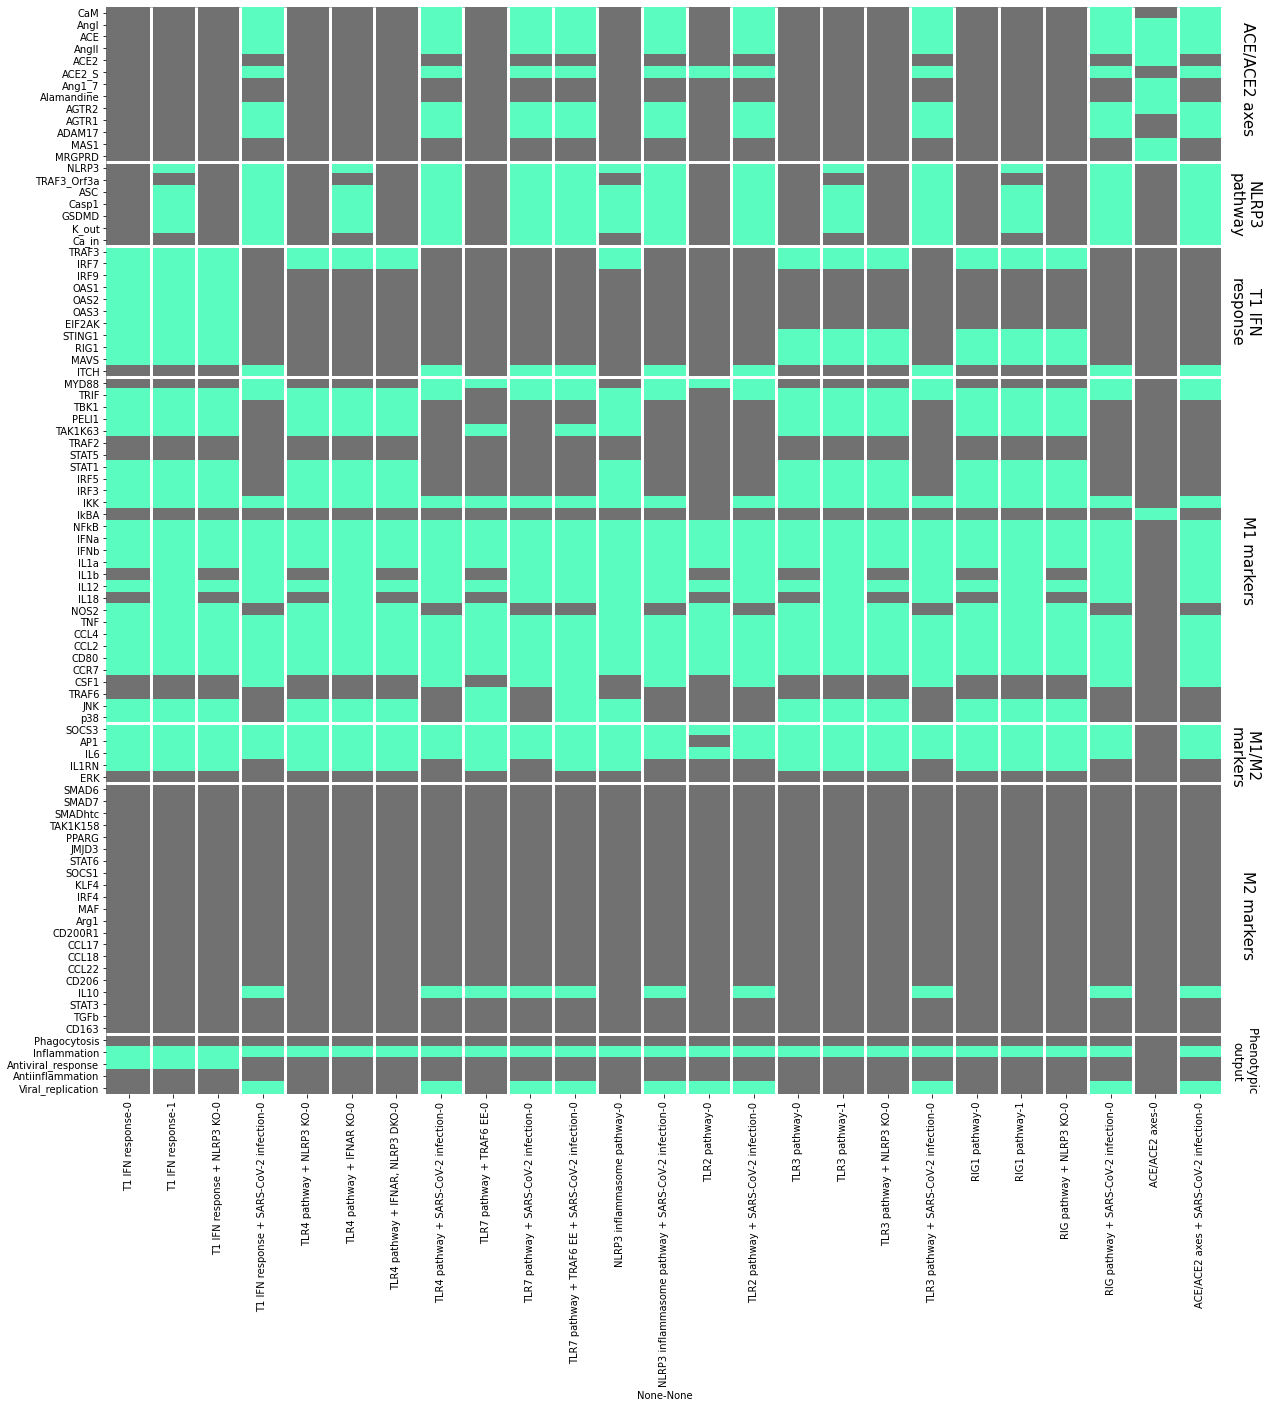

In [6]:
reduced_fp_validation_summary = fp_validation_summary.drop(["IFNG", "IFNGR", "GMCSF", "CSF2RA", "IL6_e", "IL6R", "IL1b_e", "IL1R", "OxPLs", "TLR4", "TLR7", "TLR3", "TLR2", "IFNa_e", "IFNb_e", "IFNAR", "TNF_e", "TNFR", "IL4", "IL4RA", "IL13", "IL10_e", "IL10R", "VdsRNA", "VssRNA", "Nsp1", "Nsp3", "Nsp13", "Nsp15", "S", "E", "N", "M", "Orf3a", "Orf6", "Orf7a", "Orf8", "Orf9b", "TGFb_e", "TGFR"], axis=1)
heatmapDF = reduced_fp_validation_summary.transpose()
fig, heatmap = plt.subplots(figsize=(20,20))
heatmap.hlines([13, 20, 31, 60, 65, 86], xmin=0, xmax=25, colors="w", linewidth=3)
plt.text(25.4, 6, 'ACE/ACE2 axes', fontsize=15, ha ='left', va ='center', rotation=270)
plt.text(25.5, 16.6, '''NLRP3
pathway''', fontsize=15, ha ='center', va ='center', rotation=270)
plt.text(25.5, 25.5, '''T1 IFN
response''', fontsize=15, ha ='center', va ='center', rotation=270)
plt.text(25.4, 46.3, 'M1 markers', fontsize=15, ha ='left', va ='center', rotation=270)
plt.text(25.5, 62.8, '''M1/M2 
markers''', fontsize=15, ha ='center', va ='center', rotation=270)
plt.text(25.4, 76, 'M2 markers', fontsize=15, ha ='left', va ='center', rotation=270)
plt.text(25.5, 88.3, '''Phenotypic 
output''', fontsize=12, ha ='center', va ='center', rotation=270)
heatmap.vlines([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25], ymin=0, ymax=131, colors="w", linewidth=3)
hmap = sb.heatmap(heatmapDF, cmap=(sb.color_palette(['#717171', '#5BFCBF'])), cbar=False)

<center>Figure 3.1.1. Heatmap of the fixed points reached upon different conditions for the validation of the Macrophage-specific modules. Each column in the matrix represents a fixed point. The stimulatory conditions are described in the bottom row (below each fixed point), and the node names are in the left-side column. Activated nodes are colored in green and non-activated nodes are colored in gray.</center>

### 3.2. Functionality of the Macrophage model in acute COVID infection
Similarly, to evaluate the functionality of the macrophage model, the virus nodes and the inflammatory microenvironment nodes were difined as input, and the attractors were stimated using bioLQM. The stimated attractors can be seen in Table 3.2.1. and in the heatmap in Figure 3.2.1.

In [11]:
# Response to inflammation
inflammation = biolqm.perturbation(biolqmodel, "IFNG%1 GMCSF%0 IL6_e%0 IL1b_e%1 OxPLs%1 IFNa_e%1 IFNb_e%1 TNF_e%1 TGFb_e%0 IL4%0 IL13%0 IL10_e%0 VdsRNA%0 VssRNA%0 Nsp1%0 Nsp3%0 Nsp13%0 Nsp15%0 S%0 E%0 N%0 M%0 Orf3a%0 Orf6%0 Orf7a%0 Orf8%0 Orf9b%0 AngI%0")
fps_inflammation = biolqm.fixpoints(inflammation, "-u asynchronous")
inflammation_Df = pd.DataFrame(fps_inflammation)

# Response to SARS-CoV-2 infection
infection = biolqm.perturbation(biolqmodel, "IFNG%0 GMCSF%0 IL6_e%0 IL1b_e%0 OxPLs%0 IFNa_e%0 IFNb_e%0 TNF_e%0 TGFb_e%0 IL4%0 IL13%0 IL10_e%0 VdsRNA%1 VssRNA%1 Nsp1%1 Nsp3%1 Nsp13%1 Nsp15%1 S%1 E%1 N%1 M%1 Orf3a%1 Orf6%1 Orf7a%1 Orf8%1 Orf9b%1 AngI%1")
fps_infection = biolqm.fixpoints(infection, "-u asynchronous")
infection_Df = pd.DataFrame(fps_infection)

# Response to inflammation + SARS-CoV-2 infection
inflammation_infection = biolqm.perturbation(biolqmodel, "IFNG%1 GMCSF%0 IL6_e%0 IL1b_e%1 OxPLs%1 IFNa_e%0 IFNb_e%0 TNF_e%1 TGFb_e%0 IL4%0 IL13%0 IL10_e%0 VdsRNA%1 VssRNA%1 Nsp1%1 Nsp3%1 Nsp13%1 Nsp15%1 S%1 E%1 N%1 M%1 Orf3a%1 Orf6%1 Orf7a%1 Orf8%1 Orf9b%1 AngI%1")
fps_inflammation_infection = biolqm.fixpoints(inflammation_infection, "-u asynchronous")
inflammation_infection_Df = pd.DataFrame(fps_inflammation_infection)

frames2 = [inflammation_Df, infection_Df, inflammation_infection_Df]
fp_accute_COVID_summary = pd.concat(frames2, keys=["Inflammation", "Infection", "Inflammation + Infection"])
print("Table 3.1.2. Fixed points reached upon inflammatory conditions and virus infection in the COVID19 Macrophage model. Each row represents a fixed point. The stimulatory conditions are described in the first column, and the node names are in the first row. The nodes can be in a non-activated state (0) or an activated state (1).")
fp_accute_COVID_summary

Table 3.1.2. Fixed points reached upon inflammatory conditions and virus infection in the COVID19 Macrophage model. Each row represents a fixed point. The stimulatory conditions are described in the first column, and the node names are in the first row. The nodes can be in a non-activated state (0) or an activated state (1).


IFNG  IFNGR  GMCSF  CSF2RA  IL6_e  IL6R  IL1b_e  \
Inflammation             0     1      1      0       0      0     0       1   
Infection                0     0      0      0       0      0     0       0   
Inflammation + Infection 0     1      1      0       0      0     0       1   

                            IL1R  OxPLs  TLR4  TLR7  TLR3  TLR2  IFNa_e  \
Inflammation             0     1      1     1     0     0     0       1   
Infection                0     0      0     0     1     1     1       0   
Inflammation + Infection 0     1      1     1     1     1     1       0   

                            IFNb_e  IFNAR  TNF_e  TNFR  TGFb_e  TGFR  IL4  \
Inflammation             0       1      1      1     1       0     0    0   
Infection                0       0      0      0     0       0     0    0   
Inflammation + Infection 0       0      0      1     1       0     0    0   

                            IL4RA  IL13  IL10_e  IL10R  VdsRNA  VssRNA  Nsp1  \
Inflammation             0      0     0       0      0       0       0     0   
Infection                0      0     0       0      0       1       1     1   
Inflammation + Infection 0      0     0       0      0       1       1     1   

                            Nsp3  Nsp13  Nsp15  S  E  N  M  Orf3a  Orf6  \
Inflammation             0     0      0      0  0  0  0  0      0     0   
Infection                0     1      1      1  1  1  1  1      1     1   
Inflammation + Infection 0     1      1      1  1  1  1  1      1     1   

                            Orf7a  Orf8  Orf9b  CaM  AngI  ACE  AngII  ACE2  \
Inflammation             0      0     0      0    0     0    0      0     0   
Infection                0      1     1      1    1     1    1      1     0   
Inflammation + Infection 0      1     1      1    1     1    1      1     0   

                            ACE2_S  Ang1_7  Alamandine  AGTR2  AGTR1  ADAM17  \
Inflammation             0       0       0           0      0      0       0   
Infection                0       1       0           0      1      1       1   
Inflammation + Infection 0       1       0           0      1      1       1   

                            MAS1  MRGPRD  NLRP3  TRAF3_Orf3a  ASC  Casp1  \
Inflammation             0     0       0      1            0    1      1   
Infection                0     0       0      1            1    1      1   
Inflammation + Infection 0     0       0      1            1    1      1   

                            GSDMD  K_out  Ca_in  TRAF3  IRF7  IRF9  OAS1  \
Inflammation             0      1      1      0      1     1     1     0   
Infection                0      1      1      1      0     0     0     0   
Inflammation + Infection 0      1      1      1      0     0     0     0   

                            OAS2  OAS3  EIF2AK  STING1  RIG1  MAVS  ITCH  \
Inflammation             0     0     0       0       0     0     0     0   
Infection                0     0     0       0       0     0     0     1   
Inflammation + Infection 0     0     0       0       0     0     0     1   

                            MYD88  TRIF  TBK1  PELI1  TAK1K63  TRAF2  STAT5  \
Inflammation             0      1     1     1      1        1      1      1   
Infection                0      1     1     0      0        0      0      0   
Inflammation + Infection 0      1     1     0      0        1      1      1   

                            STAT1  IRF5  IRF3  IKK  IkBA  NFkB  IFNa  IFNb  \
Inflammation             0      1     1     1    1     0     1     1     1   
Infection                0      0     0     0    1     0     1     1     1   
Inflammation + Infection 0      0     1     0    1     0     1     1     1   

                            IL1a  IL1b  IL12  IL18  NOS2  TNF  CCL4  CCL2  \
Inflammation             0     1     1     1     1     1    1     1     1   
Infection                0     1     1     1     1     0    1     1     1   
Inflammation + Infection 0     1     1     1     1     0    1    

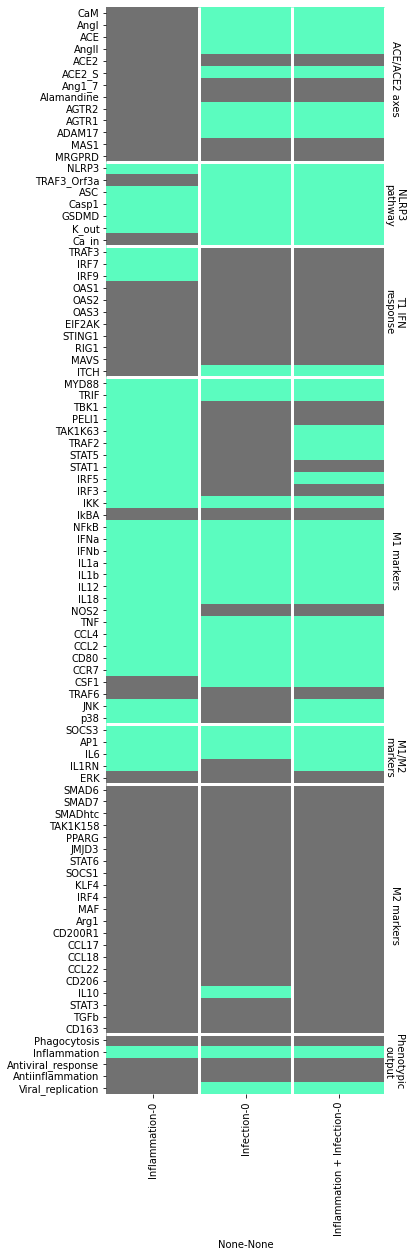

In [12]:
reduced_fp_accute_COVID_summary = fp_accute_COVID_summary.drop(["IFNG", "IFNGR", "GMCSF", "CSF2RA", "IL6_e", "IL6R", "IL1b_e", "IL1R", "OxPLs", "TLR4", "TLR7", "TLR3", "TLR2", "IFNa_e", "IFNb_e", "IFNAR", "TNF_e", "TNFR", "IL4", "IL4RA", "IL13", "IL10_e", "IL10R", "VdsRNA", "VssRNA", "Nsp1", "Nsp3", "Nsp13", "Nsp15", "S", "E", "N", "M", "Orf3a", "Orf6", "Orf7a", "Orf8", "Orf9b", "TGFb_e", "TGFR"], axis=1)
heatmapDF = reduced_fp_accute_COVID_summary.transpose()
fig, heatmap = plt.subplots(figsize=(5,20))
heatmap.hlines([13, 20, 31, 60, 65, 86], xmin=0, xmax=25, colors="w", linewidth=3)
plt.text(3.05, 6, 'ACE/ACE2 axes', fontsize=10, ha ='left', va ='center', rotation=270)
plt.text(3.1, 16.6, '''NLRP3
pathway''', fontsize=10, ha ='center', va ='center', rotation=270)
plt.text(3.1, 25.5, '''T1 IFN
response''', fontsize=10, ha ='center', va ='center', rotation=270)
plt.text(3.05, 46.3, 'M1 markers', fontsize=10, ha ='left', va ='center', rotation=270)
plt.text(3.1, 62.8, '''M1/M2 
markers''', fontsize=10, ha ='center', va ='center', rotation=270)
plt.text(3.05, 76, 'M2 markers', fontsize=10, ha ='left', va ='center', rotation=270)
plt.text(3.1, 88.3, '''Phenotypic 
output''', fontsize=10, ha ='center', va ='center', rotation=270)
heatmap.vlines([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25], ymin=0, ymax=131, colors="w", linewidth=3)
hmap = sb.heatmap(heatmapDF, cmap=(sb.color_palette(['#717171', '#5BFCBF'])), cbar=False)

<center>Figure 3.2.1. Heatmap of the fixed points reached upon inflammatory conditions and virus infection in the COVID19 Macrophage model. Each column in the matrix represents a fixed point. The stimulatory conditions are described in the bottom row (below each fixed point), and the node names are in the left-side column. Activated nodes are colored in green and non-activated nodes are colored in gray. </center>

Figure 3.2.1 summarizes the macrophage behaviour upon inflammation, SARS-CoV-2 infection, and the combination of both stimuli. 
In macrophages, the excessive inflammatory response during accute COVID19 results in the activation of several cascades that lead to the amplification and chronification of the disruptive process. Every M1 output node within the model is active under these conditions, thanks to the induction of essential transcription factors for M1 polarization (i.e. NFkB, IRF3/5, and AP1). 
According the model, the virus is able to trigger an inflammatory response when infecting a macrophage. Viral proteins crosstalk with nodes from the ACE-ACE2 axes, NLRP3 inflammasome signaling, several inflammatory transducers, and key inflammatory transcription factors, such as NFkB. Thus, the SARS-CoV-2 itself is capable of activating several proinflammatory cascades within the macrophage, independently on the surrounding microenvironment.
Finally, the combination of the inflammatory microenvironment with the viral infection leads to a state similar to the sum of the other two, with few exceptions. For this simulation, the ACE/ACE2 axes, NLRP3 pathway, M1/M2 markers, and the Phenotypic output clusters are the result of the sum of the active nodes from the other two simulations. However, in the T1 IFN response, M1 markers, and M2 markers, some nodes are turned down as a result of a negative modulation of the virus on the inflammatory response and viceversa. 

* Type 1 interferon response: the inflammatory microenvironment triggers the activation of upstream entities from this module (i.e. IFNa_e -not shown-, IFNb_e -not shown-, IFNAR -not shown-, STAT1 and IRF9. The cytosolic PRR pathway made up by RIG-1, MAVS and STING is not getting activated because its input (dsRNA) is missing. Also, in spite of having OAS1-4 and EIF2AK as inactive, this is is happening because of the formulation of their logical rules. OAS1-4 and EIF2AK are effector proteins of the type 1 interferon response, which requires both transcription (triggered by IRF9) and viral presence (represented by the dsRNA input in the model) to be active. Thus, it can be deduced that the inflammatory microenvironment induces the transcription of the antiviral effectors OAS1-4 and EIF2AK, which would be readily available to trigger their function if a virus infected the macrophage. However, coronaviruses, including SARS-CoV-2, are known for their ability to interfere and downmodulate the antiviral response. This effect can be extracted from the last simulation (inflammation + infection), in which IRF9 (essential for the transcription of the antiviral effectors within the model) is not active, since STAT1 (an upstream transducer of the pathway) is downmodulated by the viral protein Orf6. Moreover, antiviral effectors OAS1-4 and EIF2AK are inhibited another viral protein, in this case, Nsp15. Finally, ITCH is an ubiquitin ligase involved in the degradation of MAVS, TRAF3, and TRAF6, and its induced by the viral protein Orf9b. Thus, according the model, the virus is blocking the activation of the type 1 interferon at three levels: IRF9, antiviral effectors, and the cytosolic-PRR pathway. 

* M1 markers: as mentioned above, the model predicts that the inflammatory microenvironment induces every output node within the cluster. In addition, almost the totality of the internal nodes from the inflammatory pathways within this cluser are also active. However, when the inflammation is combined with the viral infection, some internal nodes are turned down, althought the states of the output nodes within the cluster still concordate, with the exceptions of NOS2 (downmodulated by AGTR2, which is turned on upon viral presence). Downmodulated internal nodes include TBK1, PELl, STAT1, and IRF3. TBK1 activates PELl1, but the first is inhibited by the viral protein Nsp13. As mentioned above, STAT1 is downregulated by Orf6, and finally, IRF3 is inhibited by Orf6, Orf8, and Nsp3. Althought these nodes are part of the M1 markers cluster, all of them crosstalk with the type 1 interferon response module; TBK1 and PELl1 activate IRF7, which is responsible for the transcription of type 1 interferons. Moreover, TBK1 is also involved in the activation of IRF3, another positive regulator of the transcription of type 1 interferons. Finally, the inhibition of STAT1 by Orf6 prevents the activation of IRF9. To conclude, the model predicts that during the accute phase of COVID19, some of transducers of key inflammatory cascades are turned down to prevent the activation of the type 1 interferon response, while the macrophage is still able to produce several proinflammatory mediators.

* M2 markers: according to the model, the SARS-CoV-2 is able to trigger the expression of IL10 when infecting a macrophage. However, the inflammatory microenvironment generates a signal that inhibits this effect; the activation of IRF5 suppresses the expression of IL10.

In conclusion, during the acute phase of COVID-19, infected macrophages are forced to produce proinflammatory mediators which, through autocrine loops and in combination with other mediators produced by other cell types contribute to the amplification and chronification of the cytokine storm. On the other hand, the virus blocks the production of type 1 interferons thus blocking the antiviral response, thus contributing to prolong the impact of the disease in terms of both time and strength.